[*********************100%%**********************]  1 of 1 completed


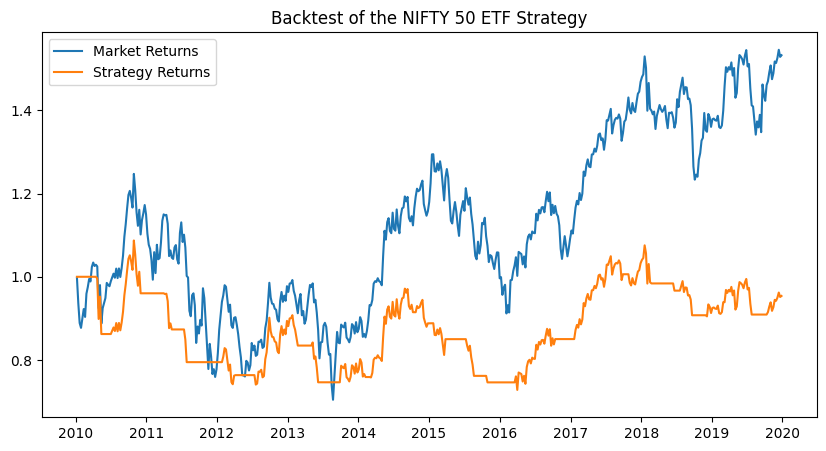

[*********************100%%**********************]  1 of 1 completed


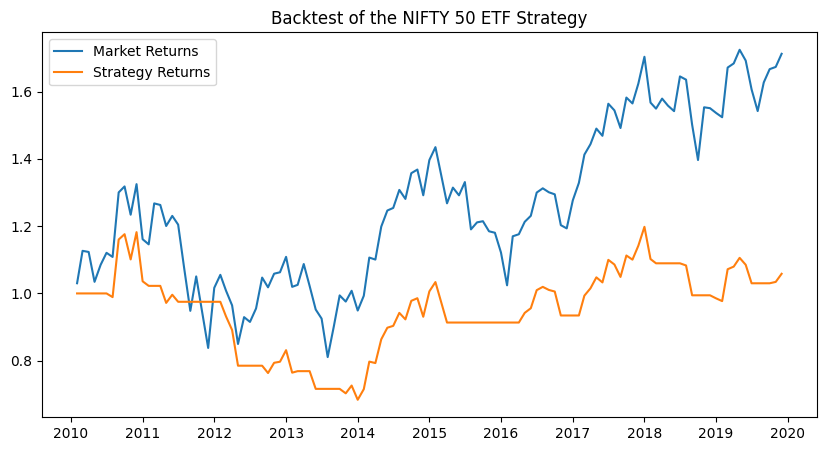

,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA,Signal,Position,Market Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
Date,,,,,,,,,,,,,,
2010-01-01,25.889999,26.680000,23.420000,23.770000,20.207525,1016900,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2010-02-01,24.020000,24.559999,22.500000,24.490000,20.819618,635200,20.513572,NaN,0,0.0,0.029841,0.000000,1.030290,1.000000
2010-03-01,24.750000,27.090000,24.639999,26.780001,22.766409,863700,21.793014,NaN,0,0.0,0.089390,0.000000,1.126630,1.000000
2010-04-01,27.100000,27.990000,26.510000,26.700001,22.698397,1341400,22.732403,NaN,0,0.0,-0.002992,-0.000000,1.123265,1.000000
2010-05-01,27.090000,28.000000,21.330000,24.590000,20.904631,1474900,21.801514,NaN,0,0.0,-0.082324,-0.000000,1.034497,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,35.900002,36.169998,33.709999,34.779999,31.161844,3211500,31.811423,33.410001,0,0.0,-0.040845,-0.000000,1.542091,1.030164
2019-09-01,33.849998,37.279999,33.750000,36.700001,32.882107,2066700,32.021976,33.261173,0,0.0,0.053734,0.000000,1.627221,1.030164
2019-10-01,35.889999,37.869999,35.209999,37.590000,33.679520,2582200,33.280813,33.203681,1,1.0,0.023961,0.000000,1.666682,1.030164


In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(symbol, start_date, end_date, interval):
    """ Fetch historical data for an ETF that tracks NIFTY 50 at a specified interval. """
    data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce').fillna(method='ffill')
    return data

def calculate_moving_averages(data, short_window, long_window):
    """ Calculate short and long moving averages. """
    data['Short_MA'] = data['Adj Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Adj Close'].rolling(window=long_window).mean()
    return data

def generate_signals(data):
    """ Generate the trading signals. """
    data['Signal'] = 0
    data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1
    data['Position'] = data['Signal'].diff()
    return data

def backtest_strategy(data):
    """ Calculate strategy returns and plot the results. """
    data['Market Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    data['Strategy Returns'] = data['Market Returns'] * data['Signal'].shift(1)
    data['Cumulative Market Returns'] = np.exp(data['Market Returns'].cumsum())
    data['Cumulative Strategy Returns'] = np.exp(data['Strategy Returns'].cumsum())

    plt.figure(figsize=(10,5))
    plt.plot(data['Cumulative Market Returns'], label='Market Returns')
    plt.plot(data['Cumulative Strategy Returns'], label='Strategy Returns')
    plt.title('Backtest of the NIFTY 50 ETF Strategy')
    plt.legend()
    plt.show()

    return data

# Parameters
symbol = 'INDY'  # Adjust if needed for an actual NIFTY 50 ETF
start_date = '2010-01-01'
end_date = '2020-01-01'
short_window = 4  # Adjusted for weekly data
long_window = 16  # Adjusted for weekly data

# Weekly Strategy Execution
weekly_data = fetch_data(symbol, start_date, end_date, '1wk')
weekly_data = calculate_moving_averages(weekly_data, short_window, long_window)
weekly_data = generate_signals(weekly_data)
backtest_strategy(weekly_data)

# Monthly Strategy Execution
monthly_data = fetch_data(symbol, start_date, end_date, '1mo')
short_window = 2  # Adjusted for monthly data
long_window = 6  # Adjusted for monthly data
monthly_data = calculate_moving_averages(monthly_data, short_window, long_window)
monthly_data = generate_signals(monthly_data)
backtest_strategy(monthly_data)


[*********************100%%**********************]  1 of 1 completed


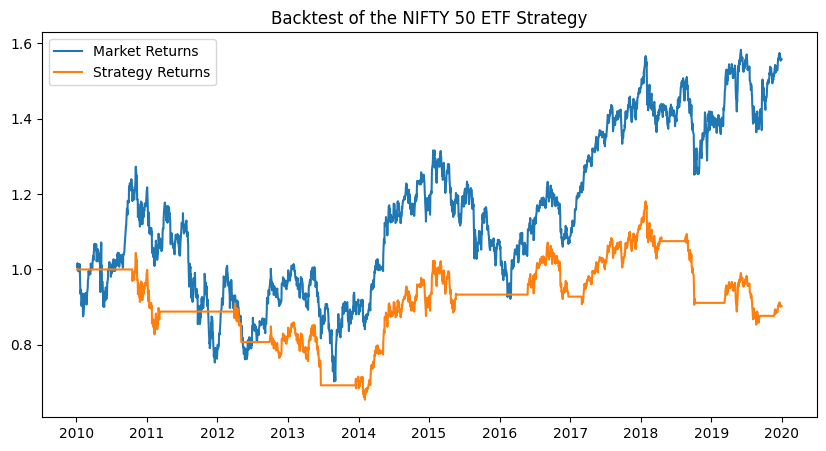

,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA,Signal,Position,Market Returns,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns
Date,,,,,,,,,,,,,,
2010-01-04,25.889999,26.150000,25.889999,26.129999,22.213825,34300,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2010-01-05,26.400000,26.400000,26.129999,26.299999,22.358347,53800,NaN,NaN,0,0.0,0.006485,0.000000,1.006506,1.000000
2010-01-06,26.680000,26.680000,26.400000,26.480000,22.511372,97700,NaN,NaN,0,0.0,0.006821,0.000000,1.013395,1.000000
2010-01-07,26.620001,26.620001,26.459999,26.559999,22.579378,44300,NaN,NaN,0,0.0,0.003016,0.000000,1.016456,1.000000
2010-01-08,26.350000,26.480000,26.260000,26.440001,22.477367,22600,NaN,NaN,0,0.0,-0.004528,-0.000000,1.011864,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.779999,38.790001,38.700001,38.720001,34.691967,35500,33.861223,33.241975,1,0.0,-0.003352,-0.003352,1.561729,0.905449
2019-12-26,38.490002,38.540001,38.459999,38.520000,34.512768,30900,33.902616,33.250741,1,0.0,-0.005179,-0.005179,1.553662,0.900772
2019-12-27,38.810001,38.860001,38.549999,38.549999,34.539650,24200,33.939530,33.258839,1,0.0,0.000779,0.000779,1.554872,0.901474


In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_data(symbol, start_date, end_date):
    """ Fetch historical data for an ETF that tracks NIFTY 50. """
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce').fillna(method='ffill')
    return data

def calculate_moving_averages(data, short_window, long_window):
    """ Calculate short and long moving averages. """
    data.loc[:, 'Short_MA'] = data['Adj Close'].rolling(window=short_window).mean()
    data.loc[:, 'Long_MA'] = data['Adj Close'].rolling(window=long_window).mean()
    return data

def generate_signals(data):
    """ Generate the trading signals. """
    data['Signal'] = 0
    data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1
    data['Position'] = data['Signal'].diff()
    return data

def backtest_strategy(data):
    """ Calculate strategy returns and plot the results. """
    data['Market Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    data['Strategy Returns'] = data['Market Returns'] * data['Signal'].shift(1)
    data['Cumulative Market Returns'] = np.exp(data['Market Returns'].cumsum())
    data['Cumulative Strategy Returns'] = np.exp(data['Strategy Returns'].cumsum())

    plt.figure(figsize=(10,5))
    plt.plot(data['Cumulative Market Returns'], label='Market Returns')
    plt.plot(data['Cumulative Strategy Returns'], label='Strategy Returns')
    plt.title('Backtest of the NIFTY 50 ETF Strategy')
    plt.legend()
    plt.show()

    return data

# Parameters
symbol = 'INDY'  # This is an example symbol for an ETF that tracks NIFTY 50; adjust if needed
start_date = '2010-01-01'
end_date = '2020-01-01'
short_window = 50
long_window = 200

# Execution
data = fetch_data(symbol, start_date, end_date)
data = calculate_moving_averages(data, short_window, long_window)
data = generate_signals(data)
backtest_strategy(data)
